In [1]:
# keras and tf

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8448 - loss: 0.5216 - val_accuracy: 0.9693 - val_loss: 0.1199
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9535 - loss: 0.1562 - val_accuracy: 0.9712 - val_loss: 0.0977
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9654 - loss: 0.1149 - val_accuracy: 0.9767 - val_loss: 0.0839
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9742 - loss: 0.0868 - val_accuracy: 0.9788 - val_loss: 0.0739
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9803 - val_loss: 0.0690
313/313 - 0s - 1ms/step - accuracy: 0.9758 - loss: 0.0764

Точность на тестовых данных: 0.9757999777793884


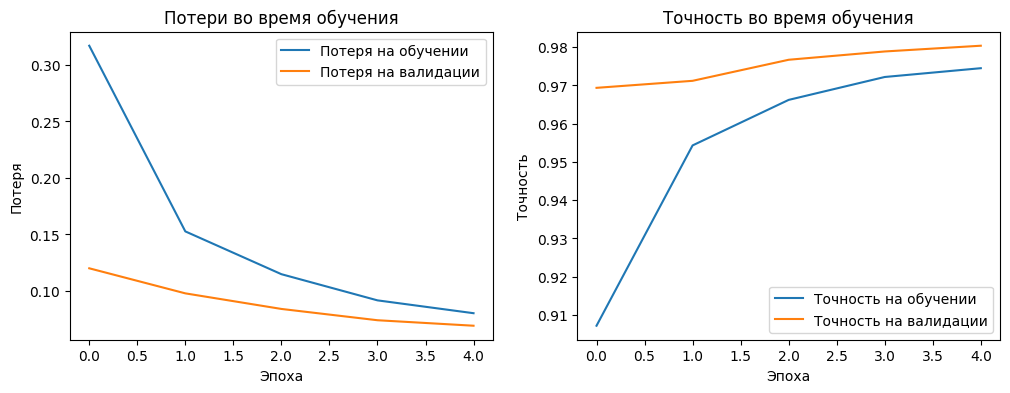

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Загрузка и подготовка данных MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Добавление канала (необходимо для некоторых типов слоев, например, сверточных)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Построение модели
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Преобразование 2D-изображения в 1D-вектор
    layers.Dense(128, activation='relu'),      # Полносвязный слой с 128 нейронами и ReLU активацией
    layers.Dropout(0.2),                       # Dropout слой для предотвращения переобучения
    layers.Dense(10, activation='softmax')     # Выходной слой с 10 нейронами для классификации
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обзор структуры модели
model.summary()

# Обучение модели
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nТочность на тестовых данных: {test_acc}')

# Визуализация результатов обучения
plt.figure(figsize=(12, 4))

# Потери (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потеря на обучении')
plt.plot(history.history['val_loss'], label='Потеря на валидации')
plt.title('Потери во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

# Точность (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()


In [3]:
# RNN
# Этот пример будет включать создание и обучение RNN для решения задачи классификации текста на положительный и отрицательный

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.datasets import imdb # веб-сайт со свободно редактируемой и крупнейшей в мире базой данных о кинематографе
from tensorflow.keras.preprocessing import sequence

# Загрузка данных
# Используем набор данных IMDB для классификации отзывов на положительные и отрицательные
max_features = 10000  # размер словаря
maxlen = 500  # максимальная длина отзыва

print('Загрузка данных...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'тренировочных последовательностей')
print(len(input_test), 'тестовых последовательностей')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Создание модели RNN
# экземпляр Sequential, который представляет собой линейный стек слоев.
# Это наиболее простой тип модели в Keras.
# Модели типа Sequential подходят, когда есть один вход и один выход, и слои следуют строго последовательно.
model = Sequential()

# Слой Embedding преобразует положительные целочисленные индексы (идентификаторы слов) в плотные векторы фиксированного размера.
# Здесь max_features — это размер словаря (число уникальных слов),
# а 32 — размерность вектора встраивания.
# Этот слой используется как первый слой в модели и требует указания размера входных данных (input_dim), который здесь равен max_features.
model.add(Embedding(max_features, 32))

# SimpleRNN — это слой, который представляет собой базовую рекуррентную нейронную сеть.
# Здесь 32 обозначает количество нейронов (или размерность выходного пространства) в этом слое.
# RNN обрабатывает последовательности, передавая выходные данные предыдущего временного шага обратно на вход следующего шага.
# Это позволяет сети учитывать предыдущий контекст при обработке последующих шагов в последовательности.
model.add(SimpleRNN(32))

# Полносвязный слой Dense с одним нейроном используется как выходной слой модели.
# 1 указывает на количество нейронов (в данном случае один, так как мы выполняем бинарную классификацию — положительный или отрицательный отзыв).
# activation='sigmoid' означает, что в качестве функции активации используется сигмоид. С
# игмоидная функция активации выводит значения между 0 и 1, что подходит для бинарной классификации, где 0 может обозначать один класс, а 1 — другой.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Обучение модели
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Загрузка данных...
25000 тренировочных последовательностей
25000 тестовых последовательностей
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - acc: 0.5415 - loss: 0.6860 - val_acc: 0.7356 - val_loss: 0.5340
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 174ms/step - acc: 0.7996 - loss: 0.4511 - val_acc: 0.7930 - val_loss: 0.4549
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - acc: 0.8601 - loss: 0.3387 - val_acc: 0.7338 - val_loss: 0.6088
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 176ms/step - acc: 0.8978 - loss: 0.2603 - val_acc: 0.8422 - val_loss: 0.4040
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - acc: 0.9133 - loss: 0.2450 - val_acc: 0.8292 - val_loss: 0.4130
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - acc: 0.9548 - loss: 0.1311 - val_acc: 0.8148 - val_loss: 0.4701
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - acc: 0.9712 - loss: 0.0866 - val_acc: 0.8406 - val_loss: 0.4646
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - acc: 0.9816 - loss: 0.0593 - val_acc: 0.8460 - val_loss: 0.4889
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [5]:
# Таким образом, модель последовательно преобразует входные данные:
# сначала векторизует их через слой встраивания, затем обрабатывает последовательность с помощью RNN,
# и в конце принимает решение о классификации с использованием полносвязного слоя с сигмоидной активацией.

In [6]:
# Оценка качества обученной модели

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.7919 - loss: 0.6820
Тестовая точность: 0.7925599813461304
Тестовые потери: 0.6808239221572876


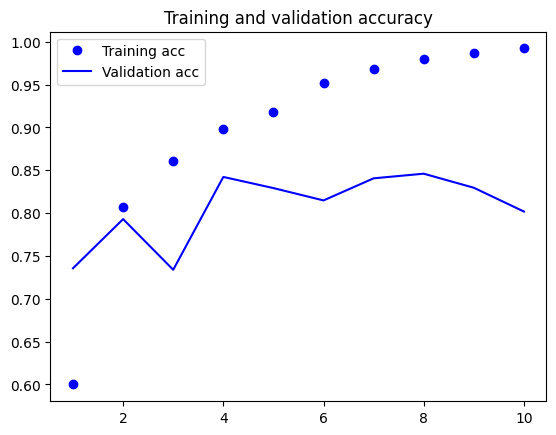

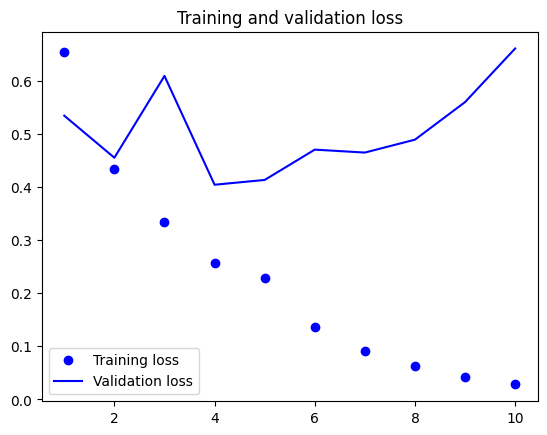

In [7]:
# Оценка модели на тестовом наборе данных
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Тестовая точность:", test_acc)
print("Тестовые потери:", test_loss)

# Анализ истории обучения
import matplotlib.pyplot as plt

# Извлечение данных о точности и потерях
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# График точности
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# График потерь
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# Пример просмотра первых нескольких обучающих обзоров
for i in range(5):
    print("Отзыв #", i + 1)
    print([word for word in input_train[i] if word > 0])  # выводим слова, исключая паддинг (0)
    print("Метка:", y_train[i])  # выводим соответствующую метку (положительный/отрицательный)
    print()


Отзыв # 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Метка: 1

Отзыв # 2
[1, 194, 1153, 194, 8255, 78, 

In [9]:
# Получение словаря слов
word_index = imdb.get_word_index()

# Преобразование индексов в слова
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Функция для преобразования последовательности индексов в слова
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Просмотр преобразованных отзывов
print(decode_review(input_train[0]))


? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film

In [10]:
new_reviews = ["Этот фильм был просто потрясающим! Невероятная игра актеров и захватывающий сюжет. Определенно один из моих любимых!",
               "Ужасный фильм. Полное разочарование. Скучный сюжет и плохая актерская игра. Не тратьте свое время."]

# Токенизация и преобразование новых отзывов в последовательность индексов
word_index = imdb.get_word_index()
new_sequences = [[word_index.get(word, 2) for word in review.lower().split()] for review in new_reviews]

# Выравнивание последовательностей
new_data = sequence.pad_sequences(new_sequences, maxlen=maxlen)

# Предсказание с использованием модели
predictions = model.predict(new_data)

# Вывод результатов
for i, review in enumerate(new_reviews):
    print("Отзыв:", review)
    print("Предсказание (близко к 1 означает положительный отзыв, близко к 0 - отрицательный):", predictions[i][0])
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Отзыв: Этот фильм был просто потрясающим! Невероятная игра актеров и захватывающий сюжет. Определенно один из моих любимых!
Предсказание (близко к 1 означает положительный отзыв, близко к 0 - отрицательный): 0.98929226

Отзыв: Ужасный фильм. Полное разочарование. Скучный сюжет и плохая актерская игра. Не тратьте свое время.
Предсказание (близко к 1 означает положительный отзыв, близко к 0 - отрицательный): 0.9553068



In [11]:
# LSTM
# Давайте создадим простую LSTM-сеть для задачи предсказания следующего элемента в последовательности.

In [12]:
# Генерация Синтетических Данных:
# Мы создаем случайную последовательность чисел, которая будет использоваться для демонстрации работы LSTM.

# Подготовка Данных: Функция prepare_data принимает последовательность и количество временных шагов (n_steps)
# для использования в качестве входных данных, и готовит набор данных так,
# чтобы каждая выборка содержала n_steps последовательных элементов в качестве входных данных и один элемент в качестве выходных данных.

# Изменение Формы Данных: LSTM в Keras требует входных данных в формате [образцы, временные шаги, признаки].
# В данном случае мы имеем один признак на временной шаг.

# Создание Модели LSTM: Модель состоит из одного LSTM слоя с 50 нейронами и функцией активации 'relu'.
# Выходной слой - это плотный слой с одним нейроном для предсказания одного значения.

# Компиляция и Обучение Модели: Модель компилируется с оптимизатором 'adam' и функцией потерь 'mse' (среднеквадратичная ошибка).
# Модель обучается на подготовленных данных.

# Предсказания: В конце мы демонстрируем, как модель может использоваться для предсказания следующего числа в новой сгенерированной последовательности.

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Генерация синтетических данных
def generate_sequence(length=100):
    return np.random.randint(0, 100, length)

# Подготовка данных для обучения LSTM
def prepare_data(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # найти конец этого шаблона
        end_ix = i + n_steps
        # проверить, не вышли ли мы за пределы последовательности
        if end_ix > len(sequence)-1:
            break
        # собрать входные и выходные части шаблона
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Параметры последовательности
n_steps = 5
sequence = generate_sequence(100)
X, y = prepare_data(sequence, n_steps)

# Изменение формы X для подачи в LSTM ([образцы, временные шаги, признаки])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X, y, epochs=100, verbose=0)

# Создание новой входной последовательности для предсказания
x_input = np.array(generate_sequence(n_steps))
print(f'Входная последовательность: {x_input}')

# Изменение формы входной последовательности для подачи в LSTM
x_input = x_input.reshape((1, n_steps, n_features))

# Предсказание моделью следующего значения
yhat = model.predict(x_input, verbose=0)
print(f'Предсказанное значение: {yhat[0][0]}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Входная последовательность: [59 39 76 10 51]
Предсказанное значение: 34.898590087890625


In [14]:
# Применение LSTM и GRU.

In [15]:
# Библиотеки и необработанные данные

In [16]:
# Базовые
import os
import time
import numpy as np

# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предварительная обработка данных
import re
import spacy
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from concurrent.futures import ProcessPoolExecutor
from sklearn.model_selection import train_test_split

# Модели архитектуры
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Утилиты
import keras.backend as K
from tensorflow.keras.models import load_model


In [17]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submit_data = pd.read_csv('sample_submission.csv')

In [18]:
# Исследовательский анализ данных

In [19]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [21]:
submit_data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [22]:
def print_short_summary(name, data):
    """
    Print data head, shape and info.

    Args:
        name (str): name of dataset
        data (dataframe): dataset in a pd.DataFrame format
    """
    print(name)
    print('\n1. Data head:')
    print(data.head())
    print('\n2 Data shape: {}'.format(data.shape))
    print('\n3. Data info:')
    data.info()

In [23]:
print_short_summary('Train data', train_data)

Train data

1. Data head:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

2 Data shape: (7613, 5)

3. Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)

In [24]:
print_short_summary('Test data', test_data)

Test data

1. Data head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

2 Data shape: (3263, 4)

3. Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [25]:
print_short_summary('Sample submission data', submit_data)

Sample submission data

1. Data head:
   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0

2 Data shape: (3263, 2)

3. Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


В нашем наборе данных есть некоторые пропущенные значения в столбцах ключевых слов и местоположения. Если мы удалим эти записи, мы потеряем около 33% данных. Поскольку мы концентрируемся на текстах Twitter, мы можем сохранить нулевые значения и использовать всю доступную информацию.

In [26]:
# Количество записей в классе

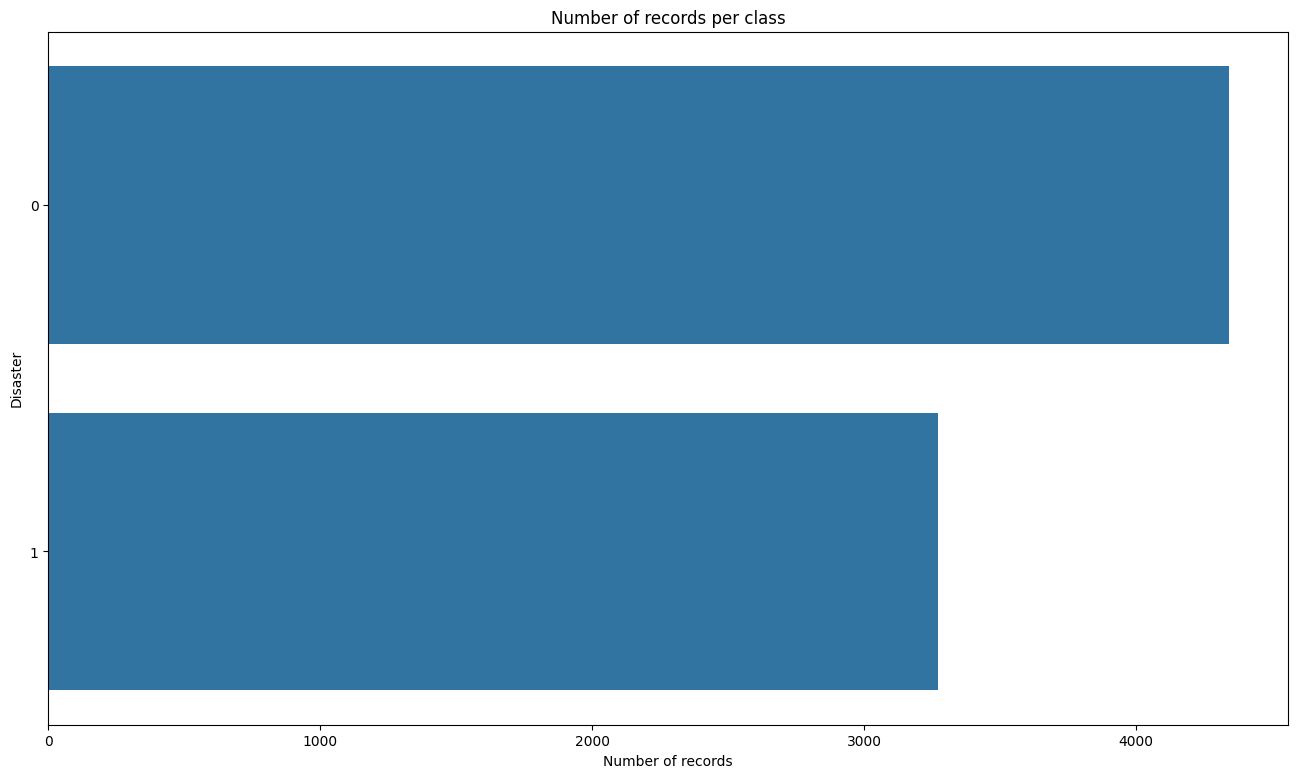

In [27]:
# Построим горизонтальную гистограмму количества записей в классе
plt.figure(figsize=(16, 9))
tmp = train_data['target'].value_counts()
sns.barplot(y=tmp.index.values, x=tmp.values, orient='h')
plt.xlabel('Number of records')
plt.ylabel('Disaster')
plt.title('Number of records per class')
plt.show()


В наборе данных меньше катастрофических твитов (примерно на 30% меньше) по сравнению с обычными, что создает дисбаланс. Чтобы решить эту проблему, мы скорректируем количество не- и катастрофических твитов, чтобы сбалансировать классы.

In [28]:
# Частота слов в классе (что мы будем называть шумом при работе с языковыми моделями)

Слова, используемые в обоих классах, значительно совпадают, что не дает конкретной информации, связанной с классом. Чтобы свести к минимуму этот шум, мы очистим данные в следующих разделах.

In [29]:
def plot_word_dist_class(labels, top_n_words = 10):
    """
    Диаграммы с частотой слов для каждого класса.

    Args:
        labels: список классов
        top_n_words (opt): сколько самых популярных слов отображать на одной диаграмме.
    """
    n = len(labels)

    # sns
    default_palette = sns.color_palette("deep")

    # Инициализация подграфики с 1 строкой и n столбцами
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(16, 9))

    # Отобразите количество слов на автора в соответствующих строках.
    for i in range(n):
        col = i % n
        indexes = train_data['target'] == labels[i]
        w = train_data['text'][indexes].str.split(expand=True).unstack().value_counts()
        l = w[:top_n_words]/np.sum(w)*100
        axes[col].bar(l.index, l.values, color=default_palette[i])
        axes[col].set_title(labels[i])
        axes[col].set_xlabel('Words')
        axes[col].set_ylabel('Percentage of total word count (%)')

    plt.tight_layout()
    plt.show()


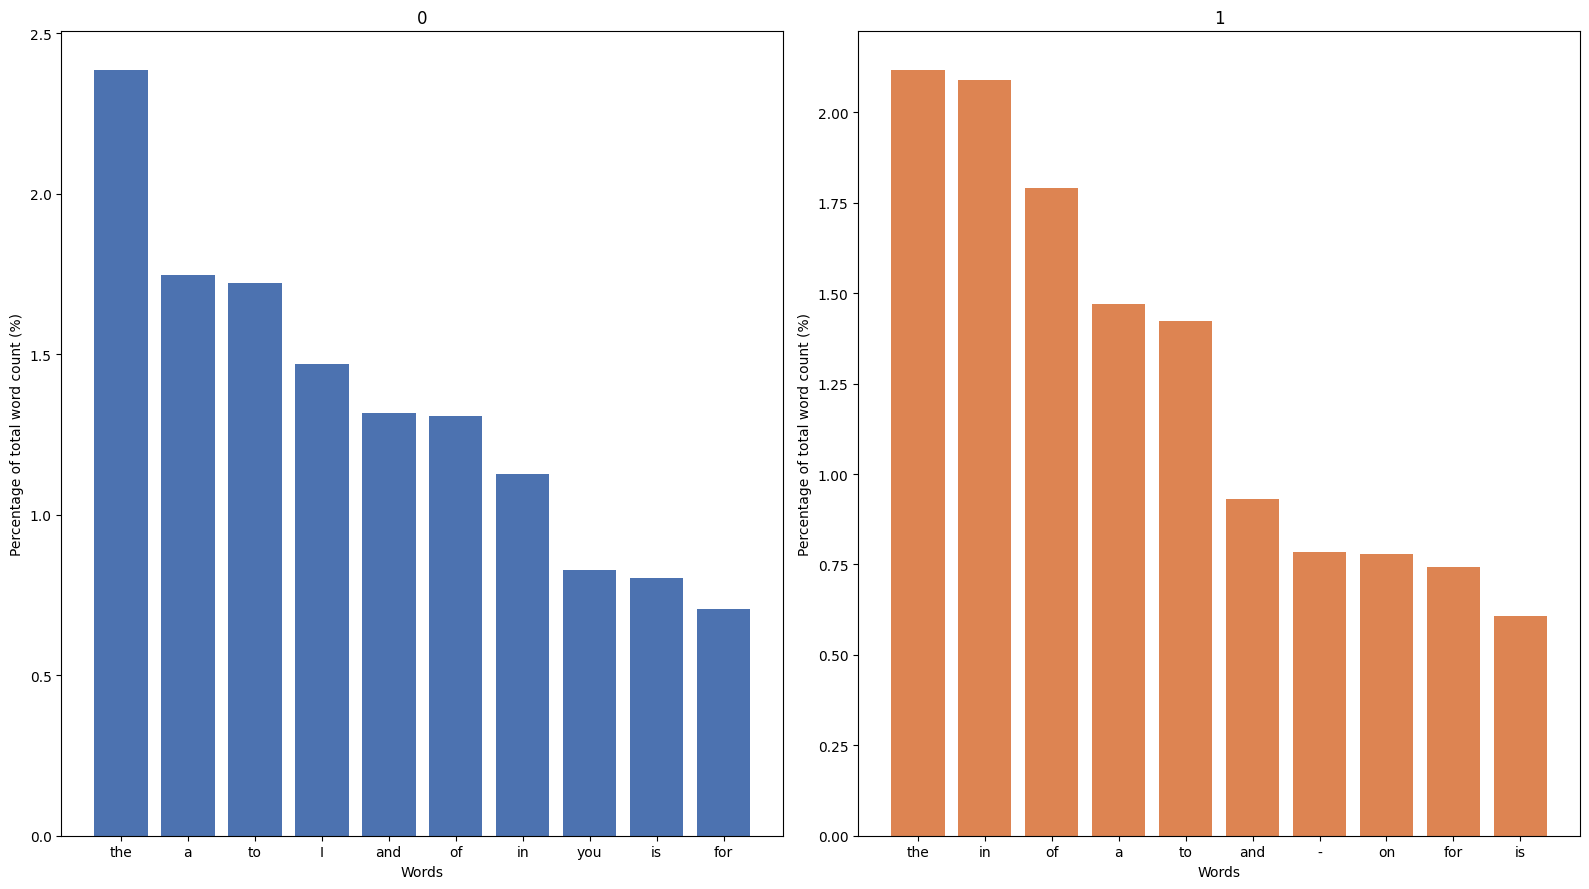

In [30]:
# Частоты слов по классам
plot_word_dist_class([0,1])

In [31]:
# Предварительная обработка данных

На этом этапе мы избавимся от отдельных букв и наиболее распространенных стоп-слов, выявленных в ходе EDA. Тем самым мы повышаем точность модели при определении класса каждого твита.

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Загрузить английские леммы
spacy_process = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Скомпилировать шаблон регулярного выражения
pattern = re.compile(r'\b([a-zA-Z])\b')

# Установите английские стоп-слова, такие как
stop_words = set(stopwords.words('english'))


In [34]:
def get_processed_text(text):
    """
    Возвращает лемматизированный текст без отдельных букв и частых стоп-слов.
    Все в нижнем регистре.

    Args:
        text (str): текст статьи
    Returns:
        string: текст чистых лемм
    """
    # Преобразовать в строчные одиночные буквы
    text = pattern.sub('', text.lower())

    # Получить лемма токены
    lemmas = spacy_process(text)
    lemmas = [token.lemma_ for token in lemmas if token.text not in stop_words]

    return ' '.join(lemmas)

def get_clean_text(texts):
    """
    Возврат списка очищенных текстов.
    Выполнение параллельное.

    Args:
        texts: пустой массив строковых элементов
    Returns:
        list: список очищенных лемматизированных токенов
    """
    # Настроить параллельную обработку задач Пул процессов
    with ProcessPoolExecutor() as executor:
        clean_texts = list(executor.map(get_processed_text, texts))

    return clean_texts


In [35]:
# Получим очищенные данные тренировочного и тестового датасета
train_text_clean = get_clean_text(train_data['text'].values)
test_text_clean = get_clean_text(test_data['text'].values)


In [36]:
# Установим чистое обучение и протестируйте фреймы данных с классами
train_data_clean = pd.DataFrame({
    'text': train_text_clean
    , 'target': train_data['target'].values
})
test_data_clean = pd.DataFrame({
    'text': test_text_clean
})


In [37]:
train_data_clean

,text,target
0,deed reason # earthquake may allah forgive we,1
1,forest fire near la ronge sask . canada,1
2,resident ask ' shelter place ' notify officer ...,1
3,"13,000 people receive # wildfire evacuation or...",1
4,get send photo ruby # alaska smoke # wildfire ...,1
...,...,...
7608,two giant crane hold bridge collapse nearby ...,1
7609,@aria_ahrary @thetawniest control wild fire ca...,1
7610,m1.94 [ 01:04 utc]?5 km volcano hawaii . htt...,1
7611,police investigate -bike collide car little ...,1


In [38]:
test_data_clean


,text
0,happen terrible car crash
1,"hear # earthquake different city , stay safe e..."
2,"forest fire spot pond , geese flee across st..."
3,apocalypse lighting . # spokane # wildfire
4,typhoon soudelor kill 28 china taiwan
...,...
3258,earthquake safety los angeles ûò safety faste...
3259,storm ri worse last hurricane . city&amp;3othe...
3260,green line derailment chicago http://.co / utb...
3261,meg issue hazardous weather outlook ( hwo ) ht...


In [39]:
# Выборка

В этом разделе основное внимание уделяется балансировке распределения классов в наборе обучающих данных путем увеличения и уменьшения количества катастрофических образцов твитов посредством повышения и понижения разрешения соответственно. Эти корректировки помогут нам проанализировать, улучшит ли дополнительная выборка возможности обучения шаблонам моделей.

In [40]:
# Получим максимальное количество записей (не катастрофы)
max_count = sum(train_data_clean['target'] == 0)

# Получим минимальное количество записей (катастрофы)
min_count = sum(train_data_clean['target'] == 1)

# Повышение твитов до максимального количества некатастрофических
data_upsampled = []
data_downsampled = []
for i in range(2):
    class_data = train_data_clean[train_data_clean['target'] == i]
    class_data_up = class_data.sample(max_count
                                     , replace = True
                                     , random_state = 0)
    class_data_down = class_data.sample(min_count
                                     , replace = True
                                     , random_state = 0)
    data_upsampled.append(class_data_up)
    data_downsampled.append(class_data_down)

train_data_clean_upsamp = pd.concat(data_upsampled)
train_data_clean_downsamp = pd.concat(data_downsampled)

In [41]:
# Проверить количество
print('Upsampled training data:')
train_data_clean_upsamp['target'].value_counts()

Upsampled training data:


,count
target,
0,4342
1,4342


In [42]:
print('Downsampled training data:')
train_data_clean_downsamp['target'].value_counts()

Downsampled training data:


,count
target,
0,3271
1,3271


In [43]:
# Токенизация текста

В этом разделе мы создаем список списков, где каждый внутренний список представляет собой предложение. Числа в этих списках являются индексами слов из исходных предложений. Эти числовые последовательности позже будут использоваться для обучения в Word2Vec.

In [44]:
# Создание и обучение токенов
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data_clean['text'].values)

# Преобразовать текст в список указателей слов в корпусе
data_list = [train_data_clean
             , train_data_clean_upsamp
             , train_data_clean_downsamp
            ]
sequences_list = []
for data in data_list:
    sequences_list.append(tokenizer.texts_to_sequences(data['text'].values))

# Получить размер словаря для матрицы
VOCAB_SIZE = len(tokenizer.word_index) + 1

Word2Vec преобразует токены в многомерные векторы, что делает их пригодными для моделей глубокого обучения. Он преобразует их в векторные представления. Прогнозируя, в нашем случае, индексы слов на основе соседних индексов, Word2Vec улучшает понимание нейронной сетью отношений токенов, улучшая общее обучение.

     sequences: список токенов или их представителей в предложении.
     vector_size: размерность векторов слов; чем выше значение, тем больше шансов уловить конкретные отношения между токенами
     window = 3: максимальное расстояние между текущим и прогнозируемым токеном в предложении; более высокое значение позволяет фиксировать отношения большей группы токенов
     min_count = 1: порог появления токена, ниже которого Word2Vec будет его игнорировать; установив значение 1, мы включаем в обучение все слова
     workers: количество ядер ЦП для параллельного обучения модели

In [45]:
# Получите максимально доступное количество ядер ЦП для обучения Word2Vec.
workers = os.cpu_count()

# Установить размерность
VECTOR_SIZE = 100

# Создать Word2Vec модель
w2v_model = Word2Vec(sentences = sequences_list[0]
         , vector_size = VECTOR_SIZE
         , window = 3
         , min_count = 1
         , workers = workers)

# Создать матрицу Word2Vec embeddings
EMBED_MATRIX = np.zeros((VOCAB_SIZE, VECTOR_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        EMBED_MATRIX[i] = w2v_model.wv[word]

In [46]:
# Разделение на тестовые и тренировчные данные

In [47]:
# Получить максимальную длину последовательности
MAX_SEQ_LEN = max(map(len, sequences_list[0]))

# Дополнить последовательности одинаковой длины для нейронных сетей
X = []
for sequences in sequences_list:
    X.append(pad_sequences(sequences, maxlen = MAX_SEQ_LEN, padding='post'))

# Установить целевые классы
y = []
for data in data_list:
    y.append(data['target'].values)

# Разделить данные на обучающие и тестовые наборы.
n = len(data_list)
X_train = [None]*n
X_test = [None]*n
y_train = [None]*n
y_test = [None]*n
for i in range(n):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i])

In [48]:
# Архитектура модели

In [49]:
# Глобальная конфигурация
NUM_EPOCHS = 10
BATCH_SIZE = 64

# Эти переменные были объявлены в предыдущих разделах
# MAX_SEQ_LEN
# VECTOR_SIZE
# VOCAB_SIZE
# EMBED_MATRIX

In [50]:
def get_model(custom_layers):
    """
    Возврат базовой модели RNN с настраиваемым слоем и внедрениями Word2Vec.

    Args:
        keras layer: слой модели RNN
    Returns:
        keras модель
    """
    model = Sequential([
        layers.Embedding(VOCAB_SIZE
                        , VECTOR_SIZE
                        , weights = [EMBED_MATRIX]
                        , input_length = MAX_SEQ_LEN
                        , trainable=True)
    ])
    for layer in custom_layers:
        model.add(layer)

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [51]:
# LSTM модель

LSTM, или длинная краткосрочная память, — это тип RNN, предназначенный для понимания долговременных связей в последовательных данных, таких как, в нашем случае, твиты. В твитах слова влияют на состояние друг друга, образуя последовательность отношений.

LSTM умеют распознавать эти взаимосвязи благодаря своим ячейкам памяти и механизмам пропускания. Эти компоненты позволяют модели узнать, какую информацию следует запомнить, что забыть и что вывести.

In [52]:
def get_model_lstm():
    """
    Модель Reuturn RNN с базовым слоем LSTM и embeddings Word2Vec.

    Returns:
        keras модель
    """
    custom_layers = [layers.LSTM(128)]

    return get_model(custom_layers)


In [53]:
# GRU

GRU, или Gated Recurrent Unit, — это еще один тип рекуррентной нейронной сети, предназначенный для понимания последовательных данных. Подобно LSTM, GRU хорошо подходит для задач, связанных с отношениями внутри последовательностей слов, таких как твиты.

Однако GRU более эффективен в вычислительном отношении, чем LSTM, благодаря своей упрощенной архитектуре, что ускоряет его обучение и требует меньше ресурсов.

In [54]:
def get_model_gru():
    """
    Создайте модель RNN с базовым слоем GRU и embeddings Word2Vec.

    Returns:
        keras модель
    """
    custom_layers = [layers.GRU(128)]

    return get_model(custom_layers)

In [55]:
# Результаты работы модели

In [56]:
def get_compiled_model(func):
    """
    Возвратная модель для обучения с использованием стратегии с несколькими графическими процессорами.
    Обеспечивает параллелизм данных путем копирования всех переменных модели
    каждому процессору.

    Args:
        func: функция для получения архитектуры модели
    Returns:
        tensorslow модель: скомпилированная модель
    """
    # Проверьте, доступен ли графический процессор
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        # Создаем зеркальную стратегию.
        strategy = tf.distribute.MirroredStrategy()

        print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
    else:
        strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
        print('No GPU available, falling back to CPU.')

    with strategy.scope():
        compiled_model = func()
        compiled_model.compile(optimizer = 'adam'
                              , loss = 'binary_crossentropy'
                              , metrics = ['accuracy'])

    return compiled_model


def get_model_results(model_name, model, X_train, y_train, X_test, y_test):
    """
    Возвращает кортеж результатов выполнения, обучения и тестов.
    Компилируйте, подгоняйте и сохраняйте модель по ходу работы.

    Args:
        model_name: имя модели для сохранения
        model: обучение модели
        X_train: данные обучения
        y_train: обучающие метки
        X_test: данные тестирования
        y_test: тестирование меток
    Returns:
        (runtime, (train_scores, test_scores) )
    """
    model = get_compiled_model(model)

    st = time.time()
    model.fit(X_train
              , y_train
              , epochs = NUM_EPOCHS
              , batch_size = BATCH_SIZE
              , validation_data = (X_test, y_test)
             )
    runtime = time.time() - st

    model.save('{}.h5'.format(model_name))

    train_scores = model.history.history['accuracy']
    test_scores = model.history.history['val_accuracy']

    tf.keras.backend.clear_session()

    return (runtime, (train_scores, test_scores))

def plot_model_scores(model_name_list, scores_list):
    """
    Постройте показатели точности обучения и тестирования модели по эпохам
    """
    n = len(scores_list)
    # Initialize subplots with n rows and 1 column
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(16, 27))

    epochs = range(1, NUM_EPOCHS + 1)
    # Plot train and test scores
    for i in range(n):
        train_scores, test_scores = scores_list[i]
        model_name = model_name_list[i]
        axes[i].plot(epochs, train_scores, label='Train score')
        axes[i].plot(epochs, test_scores, label='Test score')
        axes[i].set_title('Train and test accuracy scores of the baseline {}'.format(model_name))
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Accuracy Score')
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

In [57]:
# LSTM

Диаграммы показывают, что самая высокая точность теста, достигающая 88%, была достигнута при использовании набора данных с повышенной дискретизацией. Вероятно, это связано с тем, что у LSTM было больше данных для изучения, что позволяло ему более эффективно распознавать шаблоны.

Кроме того, важно отметить, что модели LSTM имеют тенденцию запоминать данные обучения, как видно из диаграмм. На каждом графике видны явные признаки переобучения: точность обучения приближается к 100%, а точность теста не превышает 88%.

In [58]:
# Получайте результаты тренировок и тестов за каждую эпоху
n = len(X_train)
runtime_lstm = [0]*n
scores_lstm = [0]*n
for i in range(n):
    runtime_lstm[i], scores_lstm[i] = get_model_results(
        'model_lstm_{}'.format(i)
        , get_model_lstm
        , X_train[i]
        , y_train[i]
        , X_test[i]
        , y_test[i]
    )

No GPU available, falling back to CPU.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.6191 - loss: 0.6427 - val_accuracy: 0.8020 - val_loss: 0.4464
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8971 - loss: 0.2794 - val_accuracy: 0.7810 - val_loss: 0.4666
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9528 - loss: 0.1456 - val_accuracy: 0.7847 - val_loss: 0.5141
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9723 - loss: 0.0904 - val_accuracy: 0.7700 - val_loss: 0.7192
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9810 - loss: 0.0630 - val_accuracy: 0.7684 - val_loss: 0.6307
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9871 - loss: 0.0503 - val_accuracy: 0.7521 - val_loss: 0.8240
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9929 - loss: 0.0339 - val_accuracy: 0.7799 - val_loss: 0.7466
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9911 - loss: 0.0360 - val_accuracy: 0.751

No GPU available, falling back to CPU.
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.6099 - loss: 0.6115 - val_accuracy: 0.8618 - val_loss: 0.3487
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9255 - loss: 0.2127 - val_accuracy: 0.8968 - val_loss: 0.3428
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9744 - loss: 0.0822 - val_accuracy: 0.8913 - val_loss: 0.4634
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9834 - loss: 0.0603 - val_accuracy: 0.9000 - val_loss: 0.3110
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.9879 - loss: 0.0498 - val_accuracy: 0.9033 - val_loss: 0.3569
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9935 - loss: 0.0257 - val_accuracy: 0.9056 - val_loss: 0.3061
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9959 - loss: 0.0195 - val_accuracy: 0.8913 - val_loss: 0.4920
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step 

No GPU available, falling back to CPU.
Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6084 - loss: 0.6307 - val_accuracy: 0.8185 - val_loss: 0.4205
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9163 - loss: 0.2195 - val_accuracy: 0.8741 - val_loss: 0.3068
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9740 - loss: 0.0972 - val_accuracy: 0.8771 - val_loss: 0.4393
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9818 - loss: 0.0558 - val_accuracy: 0.8582 - val_loss: 0.3414
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9902 - loss: 0.0430 - val_accuracy: 0.8722 - val_loss: 0.4087
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9915 - loss: 0.0370 - val_accuracy: 0.8484 - val_loss: 0.4416
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9947 - loss: 0.0226 - val_accuracy: 0.8698 - val_loss: 0.5064
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.99

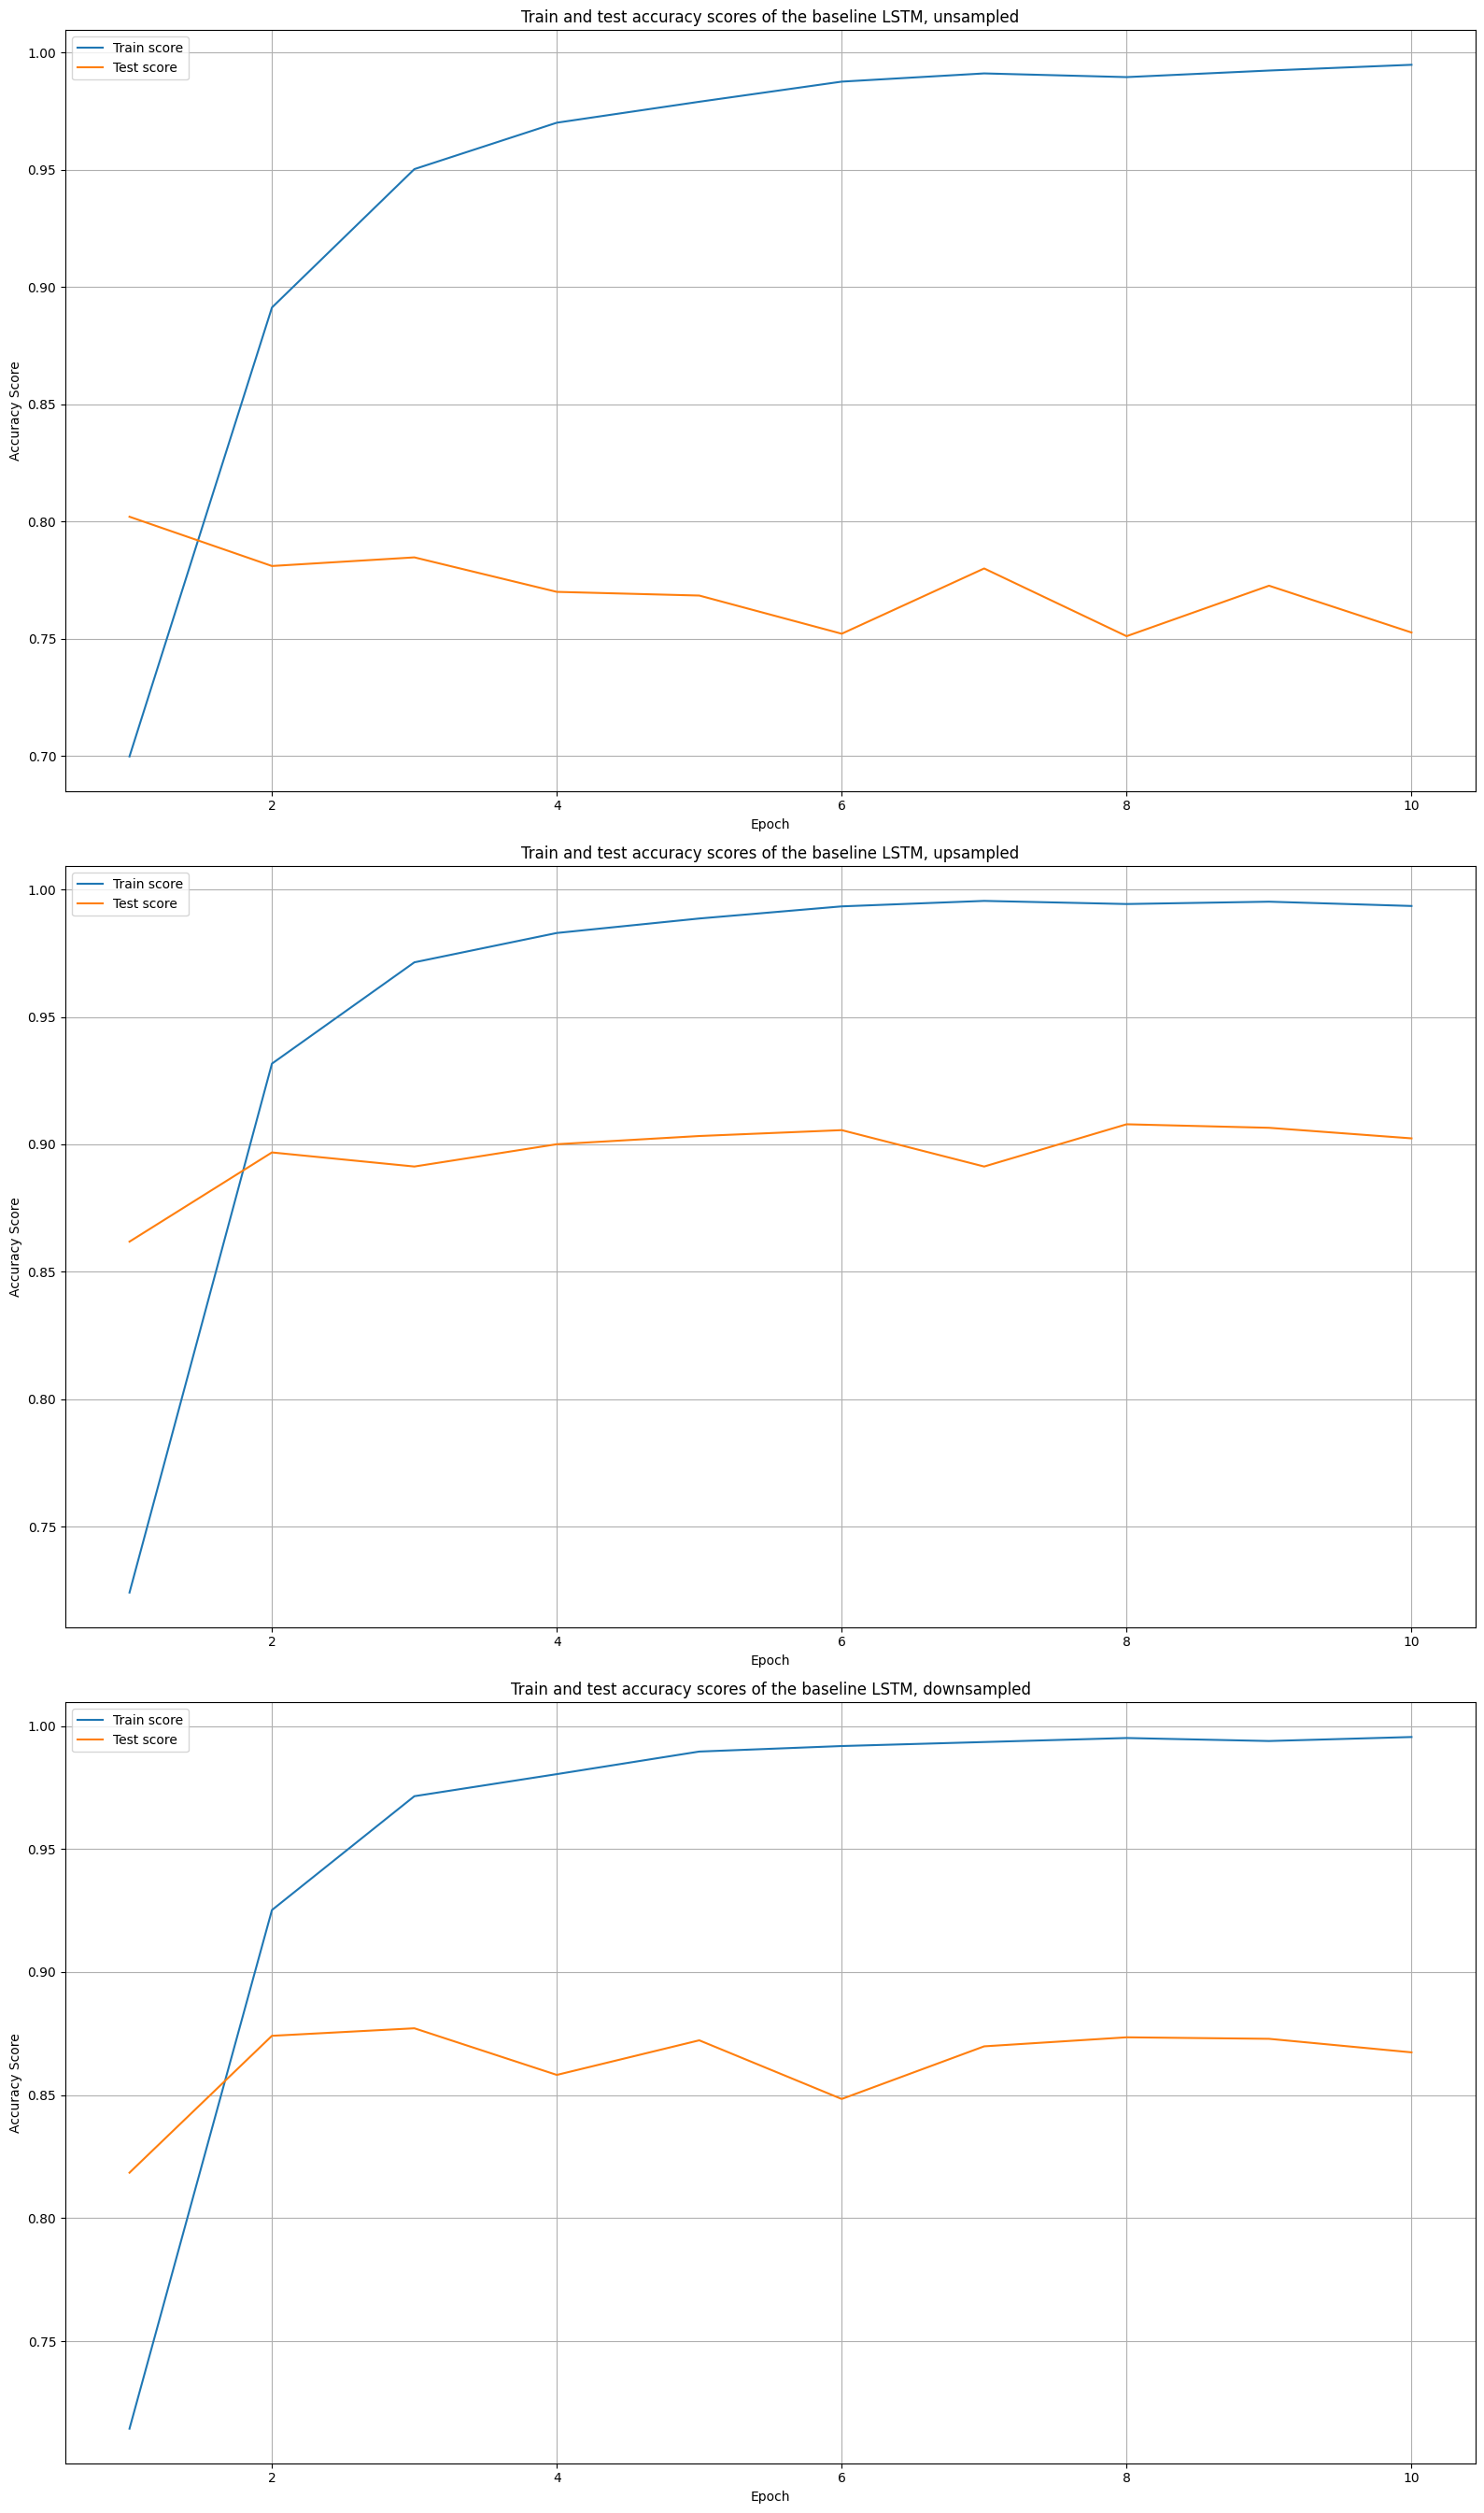

In [59]:
model_name_list = ['LSTM, unsampled', 'LSTM, upsampled', 'LSTM, downsampled']
plot_model_scores(model_name_list, scores_lstm)

In [60]:
# GRU

Базовый уровень GRU демонстрирует аналогичную картину с LSTM, показывая переоснащение в каждом сеансе обучения. Он достиг максимальной точности 90%, что немного выше, чем у LSTM.

In [61]:
# Получайте результаты тренировок и тестов за каждую эпоху
n = len(X_train)
runtime_gru = [0]*n
scores_gru = [0]*n
for i in range(n):
    runtime_gru[i], scores_gru[i] = get_model_results(
        'model_gru_{}'.format(i)
        , get_model_gru
        , X_train[i]
        , y_train[i]
        , X_test[i]
        , y_test[i]
    )

No GPU available, falling back to CPU.
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.5846 - loss: 0.6836 - val_accuracy: 0.5688 - val_loss: 0.6841
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.5806 - loss: 0.6781 - val_accuracy: 0.7883 - val_loss: 0.4755
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8204 - loss: 0.4278 - val_accuracy: 0.8114 - val_loss: 0.4494
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9207 - loss: 0.2289 - val_accuracy: 0.7910 - val_loss: 0.4742
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9659 - loss: 0.1127 - val_accuracy: 0.7169 - val_loss: 0.7766
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.9735 - loss: 0.0822 - val_accuracy: 0.7857 - val_loss: 0.7759
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9909 - loss: 0.0351 - val_accuracy: 0.7290 - val_loss: 0.7739
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy:

No GPU available, falling back to CPU.
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.4960 - loss: 0.6938 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.5694 - loss: 0.6489 - val_accuracy: 0.8498 - val_loss: 0.3652
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9023 - loss: 0.2669 - val_accuracy: 0.8904 - val_loss: 0.2871
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9647 - loss: 0.1056 - val_accuracy: 0.8862 - val_loss: 0.2791
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.9851 - loss: 0.0551 - val_accuracy: 0.9000 - val_loss: 0.3267
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9930 - loss: 0.0277 - val_accuracy: 0.9111 - val_loss: 0.3400
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9070 - val_loss: 0.3176
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms

No GPU available, falling back to CPU.
Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.5036 - loss: 0.6936 - val_accuracy: 0.4859 - val_loss: 0.6933
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.5267 - loss: 0.6748 - val_accuracy: 0.7891 - val_loss: 0.4692
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.8860 - loss: 0.3013 - val_accuracy: 0.8600 - val_loss: 0.3316
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9600 - loss: 0.1308 - val_accuracy: 0.8741 - val_loss: 0.4215
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9780 - loss: 0.0705 - val_accuracy: 0.8759 - val_loss: 0.4496
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9891 - loss: 0.0434 - val_accuracy: 0.8888 - val_loss: 0.4210
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.8863 - val_loss: 0.4747
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9

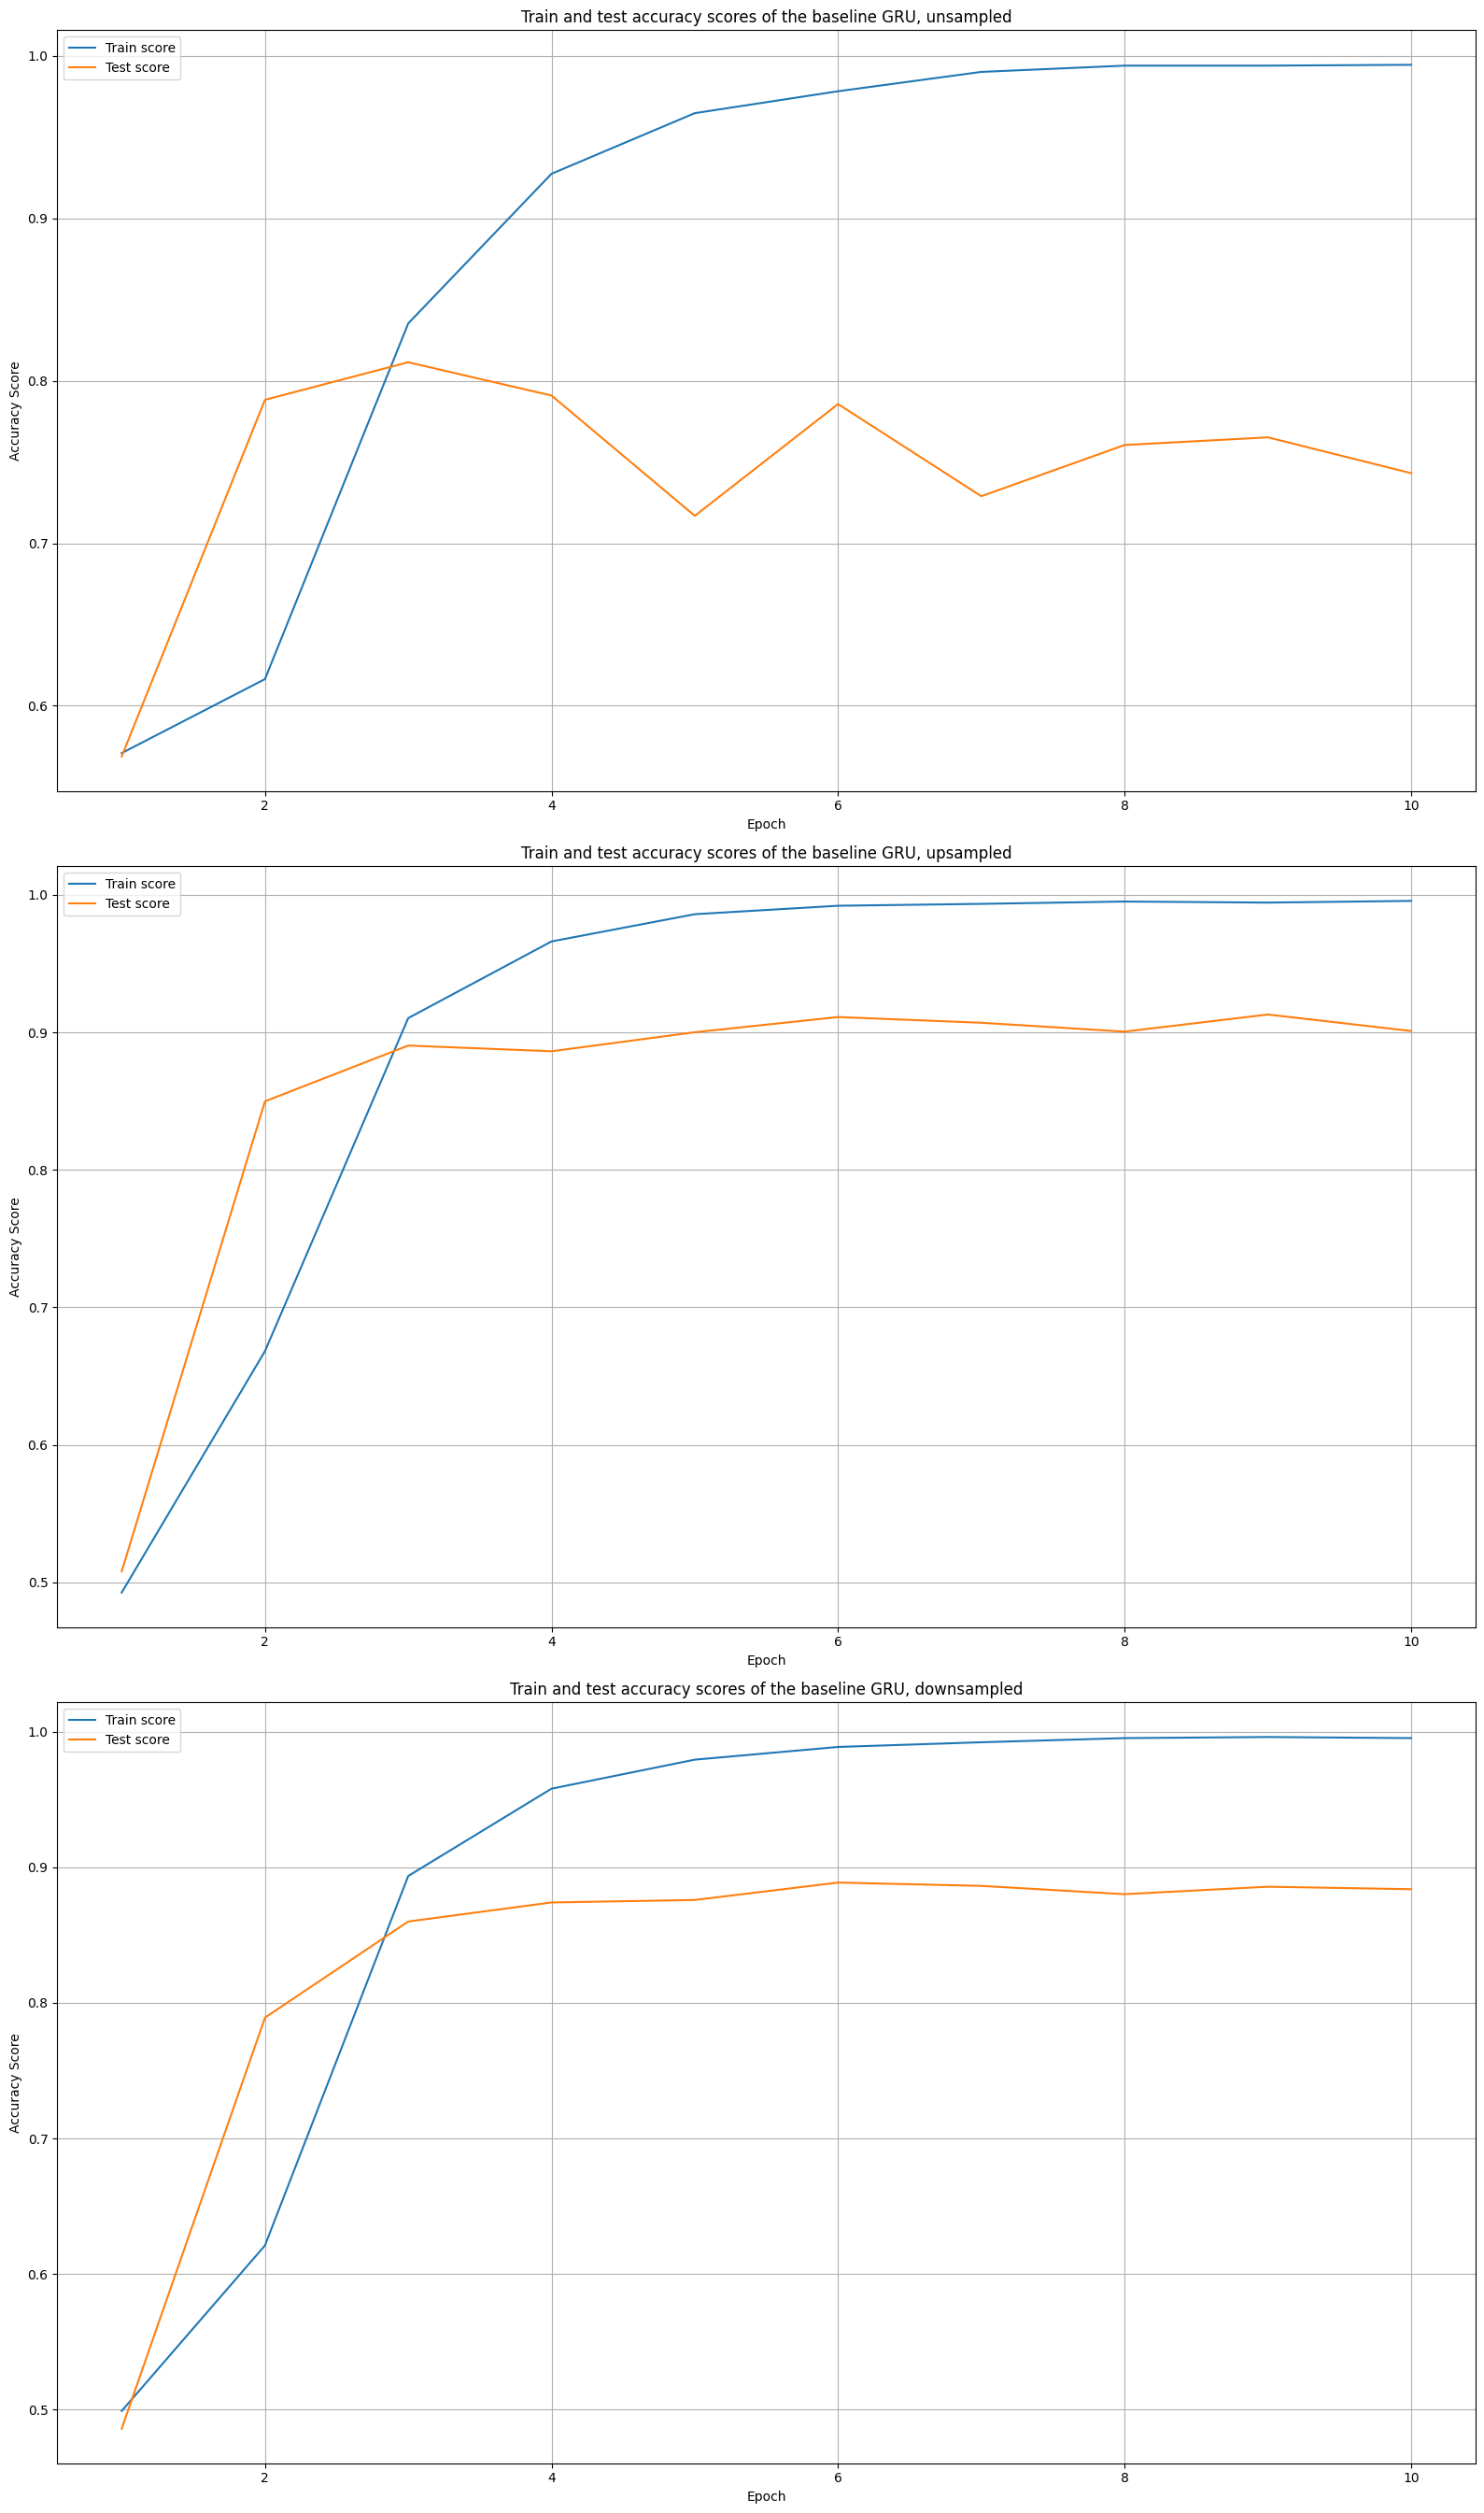

In [62]:
model_name_list = ['GRU, unsampled', 'GRU, upsampled', 'GRU, downsampled']
plot_model_scores(model_name_list, scores_gru)

In [63]:
# Таблица сравнения результатов

In [64]:
# результаты таблицы
types = ['LSTM', 'GRU']
sampling = ['original', 'upsampled', 'downsampled']
scores = [scores_lstm, scores_gru]
runtimes = [runtime_lstm, runtime_gru]
table = []
for i in range(2):
    for j in range(n):
        tmp = {
            'type': types[i]
            , 'sampling': sampling[j]
            , 'runtime (sec)': runtimes[i][j]
            , 'train_score (accuracy)': scores[i][j][0][-1]
            , 'test_score (accuracy)': scores[i][j][1][-1]
        }
        table.append(tmp)


pd.DataFrame(table).sort_values(by = ['test_score (accuracy)'
                                      ,'runtime (sec)']
                                , ascending = [False
                                               , True]).reset_index(drop = True)

,type,sampling,runtime (sec),train_score (accuracy),test_score (accuracy)
0,LSTM,upsampled,99.755789,0.993551,0.902349
1,GRU,upsampled,113.049024,0.995547,0.900967
2,GRU,downsampled,90.630691,0.995312,0.883863
3,LSTM,downsampled,87.659612,0.995516,0.867359
4,LSTM,original,95.167016,0.994745,0.752626
5,GRU,original,109.606779,0.994570,0.743172


In [65]:
# Проверка результатов на sample_submission.csv

In [66]:
# Загрузим обученную модель
model = load_model('model_gru_1.h5')

In [67]:
# Токенизация и преобразование текста в последовательности с помощью одного и того же токенизатора.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_data_clean['text'].values)
test_seq = tokenizer.texts_to_sequences(test_data_clean['text'].values)

# Создадим дополненные последовательности для входных данных модели.
pad_seq = pad_sequences(test_seq, maxlen = MAX_SEQ_LEN)

In [68]:
# Предсказаниие модели
predictions = model.predict(pad_seq)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [69]:
# Установите целевой столбец для прогнозов
submit_data['target'] = np.ravel(np.round(predictions).astype(int))

In [70]:
# Проверить на  submission
submit_data.to_csv('sample_submission.csv', index=False)

In [71]:
submit_data

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0
